<h1><center>ECE 469/569@UTK - Assignment #2</center></h1>

***

**Student Name:** Benjamin Belandres

**NetID:** bbelandr
***

### Q1. Sampling Rate Manipulation

The provided *Rocky Top.wav* file was recorded at a sampling rate of *fs = 44.1kHz*. Please write a *downsample()* function, aimed at reducing the audio file's sampling rate to *fs/n*, where *n* is an integer. Please save the downsampled audio at reduced rates, specifically when *n = 2, 4, and 8*, as *.wav* files. Please listen attentively to each of these versions and report your observations (in a separate pdf file) regarding the Nquist frequency (maximum aliased-free frequency), audio quality, and audio size, etc.

In [65]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from copy import copy, deepcopy

sampling_rate, data = wavfile.read('Rocky Top.wav')
print(sampling_rate) # Sampling rate of the music
print(data.shape) # Length of the music; 2 channels
print(type(data)) 

# plt.plot(data[:,0], label = 'Left Channel')
# plt.plot(data[:,1], label = 'Right Channel')
# plt.xlabel("Sample Index")
# plt.ylabel("Amplitude")
# plt.title('Audio Signal')
# plt.legend()
# plt.show()


44100
(2296832, 2)
<class 'numpy.ndarray'>


***downsample()* function implementation**: The function decreases the sampling rate of data by keeping the first sample and then every nth sample after the first. If *data* is a matrix, the function treats each column as a separate sequence.

In [66]:
def downsample(data, n):
    # Your implementation goes here
    tmp_data = []
    for row in range(0, len(data), n):  # Skipping every other element that is a multiple of n
        tmp_data.append(data[row])

    return np.array(tmp_data)

**Testing**: Downsampling the audio file and save it as a wave file.

In [67]:
n = 2 # You need to try different values of n
down_sampled_data = downsample(data, n) 

# You can use IPython.display.Audio to play the downsampled audio
Audio(down_sampled_data[:,0],rate=int(sampling_rate/n))

# Write audio file
# wavfile.write("downsampled_audio.wav", int(sampling_rate/n), data.astype(np.int16)) # For some reason this doubles the length

### Q2. Aliasing, and Time-Frequency Domain

Please use [specgram function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html) to analyze how *data*'s frequncy changes over time. Please generate spectrogram figures for both *data* and *downsampled_data*, and then compare them to identify any differences in frequency components. Specifically, check if there are any frequency components lost (due to undersampling) or if any additional frequency components have been introduced (due to aliasing). Please submit your analysis in a separate pdf report.

In [119]:
sampling_rate, data = wavfile.read('Rocky Top.wav')
data = data[:sampling_rate*5,0] # five seconds left-channel audio
Audio(data,rate=int(sampling_rate))

In [120]:
# The sampling rate is changed to sampling_rate/10 using the function you implemented in Q1
n = 10
downsampled_data = downsample(data, n) 
Audio(downsampled_data,rate=int(sampling_rate/10))


Please use *matplotlib.pyplot.specgram* to visulize how *data*'s and "downsampled_data"'s frequnces change over time.

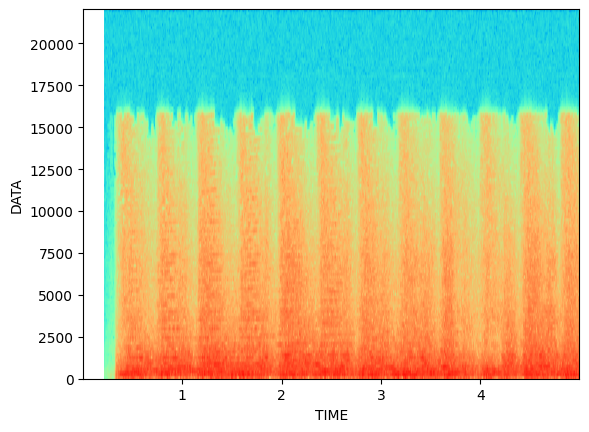

(array([[    0.        ,     0.        ,     0.        , ...,
          3799.75027707,   286.60853016,  1465.1331805 ],
        [    0.        ,     0.        ,     0.        , ...,
         15056.93704108, 10776.08515878,  2646.99504016],
        [    0.        ,     0.        ,     0.        , ...,
         38822.98470331,  3108.172501  ,  6346.69285433],
        ...,
        [    0.        ,     0.        ,     0.        , ...,
          2731.00093119,  1669.36457385,  5959.7435149 ],
        [    0.        ,     0.        ,     0.        , ...,
          9331.24609051,   655.27382901, 13770.64837372],
        [    0.        ,     0.        ,     0.        , ...,
         10806.64367501,   462.3643636 , 11460.17822103]]),
 array([   0.       ,   17.2265625,   34.453125 ,   51.6796875,
          68.90625  ,   86.1328125,  103.359375 ,  120.5859375,
         137.8125   ,  155.0390625,  172.265625 ,  189.4921875,
         206.71875  ,  223.9453125,  241.171875 ,  258.3984375,
         

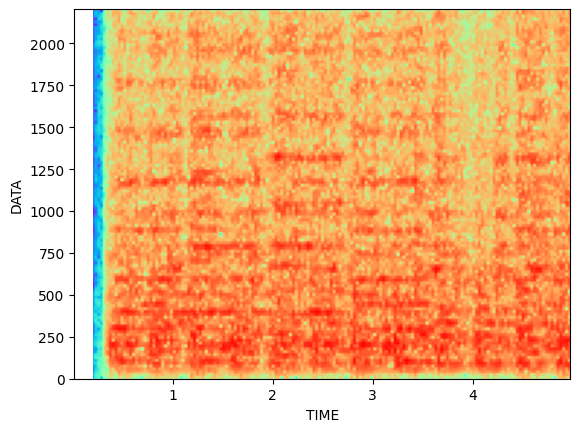

In [121]:
# Your implementation goes here. 
# Note that you need to specify its sampling rate in the function.
plt.xlabel("TIME")
plt.ylabel("DATA")
plt.specgram(data, Fs=int(sampling_rate), cmap='rainbow')
plt.show()

plt.xlabel("TIME")
plt.ylabel("DATA")
plt.specgram(downsampled_data, Fs=int(sampling_rate / n), cmap='rainbow')
